# Preprocess

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('2018_Financial_Data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [ ]:
df.shape

(4392, 224)

In [ ]:
df = df.drop(df[df['Revenue Growth'].isna()].index)

In [ ]:
cols = [
  'Gross Profit Growth',
  'Gross Margin',
  'Intangibles to Total Assets',
  'Net Income',
  'assetTurnover',
  'Revenue',
  'Interest Expense',
  'Debt to Assets',
  'R&D Expenses',
  'SG&A Expense'
]

df_new = df[cols]
labels = df['Revenue Growth']
df_new['Revenue Growth'] = labels
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Gross Profit Growth,Gross Margin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense,Revenue Growth
0,0.1115,1.0000,0.6660,1.173100e+10,0.375499,9.450700e+10,3.542000e+09,0.4440,0.000000e+00,6.482200e+10,0.1115
1,0.0564,0.4847,0.3150,1.609000e+09,0.179342,1.414400e+10,1.917000e+09,0.4733,0.000000e+00,6.010000e+08,0.0320
2,0.1187,0.6173,0.2841,2.105300e+10,0.553660,7.084800e+10,-1.260000e+08,0.2060,1.354300e+10,6.750000e+09,0.1289
3,1.1208,0.5887,0.0359,1.413500e+10,0.700641,3.039100e+10,3.420000e+08,0.1069,2.141000e+09,8.130000e+08,0.4955
4,0.7216,0.2151,0.1484,-2.235500e+10,0.390955,1.216150e+11,5.059000e+09,0.3330,0.000000e+00,1.811100e+10,0.0285


In [ ]:
df_new.shape

(4253, 11)

## Delete Outlier

In [ ]:
df_clean = df_new.copy()

In [ ]:
Q1 = df_clean['Gross Profit Growth'].quantile(0.25)
Q3 = df_clean['Gross Profit Growth'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

0.2253


In [ ]:
df_clean = df_clean[df_clean['Gross Profit Growth'] > (Q1 - 1.5 * IQR)]
df_clean = df_clean[df_clean['Gross Profit Growth'] < (Q3 + 1.5 * IQR)]

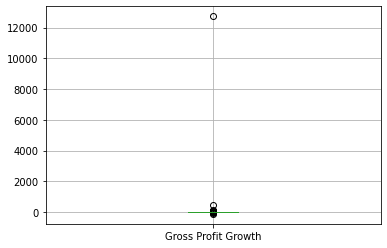

In [ ]:
df_clean.boxplot('Gross Profit Growth')

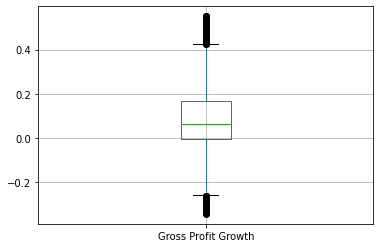

In [ ]:
df_clean.boxplot('Gross Profit Growth')

In [ ]:
df_clean.shape

(3602, 11)

In [ ]:
Q1_1 = df_clean['Gross Margin'].quantile(0.25)
Q3_1 = df_clean['Gross Margin'].quantile(0.75)

IQR_1 = Q3_1 - Q1_1
print(IQR_1)

0.519925


In [ ]:
df_clean = df_clean[df_clean['Gross Margin'] > (Q1_1 - 1.5 * IQR_1)]
df_clean = df_clean[df_clean['Gross Margin'] < (Q3_1 + 1.5 * IQR_1)]

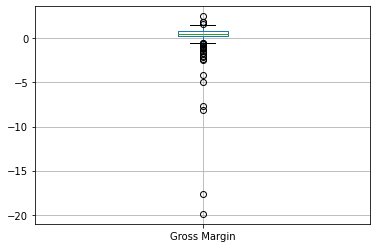

In [ ]:
df_new.boxplot('Gross Margin')

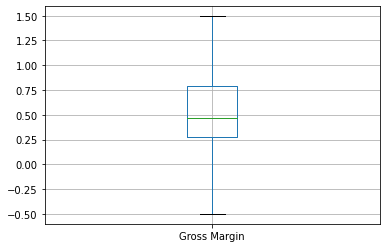

In [ ]:
df_clean.boxplot('Gross Margin')

In [ ]:
Q1_2 = df_clean['Intangibles to Total Assets'].quantile(0.25)
Q3_2 = df_clean['Intangibles to Total Assets'].quantile(0.75)

IQR_2 = Q3_2 - Q1_2
print(IQR_2)

0.29712500000000003


In [ ]:
df_clean = df_clean[df_clean['Intangibles to Total Assets'] > (Q1_2 - 1.5 * IQR_2)]
df_clean = df_clean[df_clean['Intangibles to Total Assets'] < (Q3_2 + 1.5 * IQR_2)]

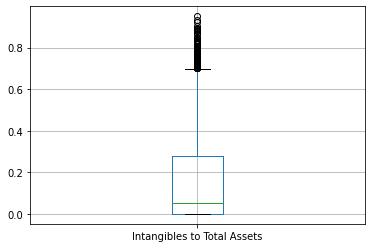

In [ ]:
df_new.boxplot('Intangibles to Total Assets')

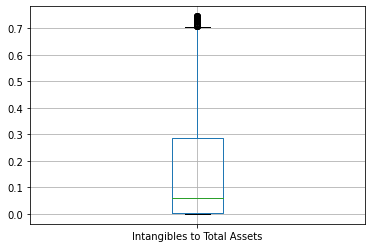

In [ ]:
df_clean.boxplot('Intangibles to Total Assets')

In [ ]:
Q1_3 = df_clean['Net Income'].quantile(0.25)
Q3_3 = df_clean['Net Income'].quantile(0.75)

IQR_3 = Q3_3 - Q1_3
print(IQR_3)

237053000.0


In [ ]:
df_clean = df_clean[df_clean['Net Income'] > (Q1_3 - 1.5 * IQR_3)]
df_clean = df_clean[df_clean['Net Income'] < (Q3_3 + 1.5 * IQR_3)]

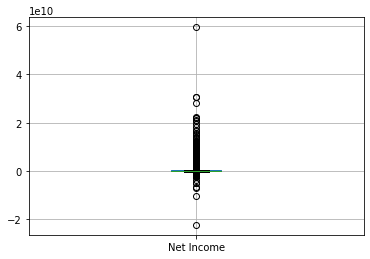

In [ ]:
df_new.boxplot('Net Income')

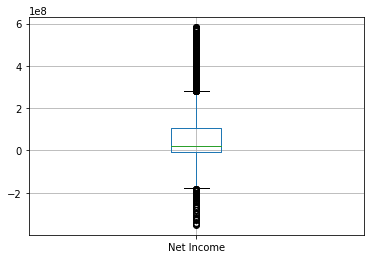

In [ ]:
df_clean.boxplot('Net Income')

In [ ]:
df_clean.shape

(2892, 11)

In [ ]:
Q1_4 = df_clean['assetTurnover'].quantile(0.25)
Q3_4 = df_clean['assetTurnover'].quantile(0.75)

IQR_4 = Q3_4 - Q1_4
print(IQR_4)

0.9271619509724649


In [ ]:
df_clean = df_clean[df_clean['assetTurnover'] > (Q1_4 - 1.5 * IQR_4)]
df_clean = df_clean[df_clean['assetTurnover'] < (Q3_4 + 1.5 * IQR_4)]

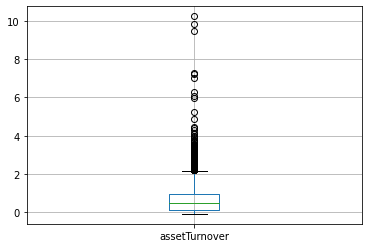

In [ ]:
df_new.boxplot('assetTurnover')

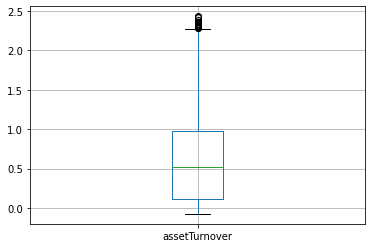

In [ ]:
df_clean.boxplot('assetTurnover')

In [ ]:
df_clean.shape

(2797, 11)

In [ ]:
Q1_5 = df_clean['Revenue'].quantile(0.25)
Q3_5 = df_clean['Revenue'].quantile(0.75)

IQR_5 = Q3_5 - Q1_5
print(IQR_5)

1374450000.0


In [ ]:
df_clean = df_clean[df_clean['Revenue'] > (Q1_5 - 1.5 * IQR_5)]
df_clean = df_clean[df_clean['Revenue'] < (Q3_5 + 1.5 * IQR_5)]

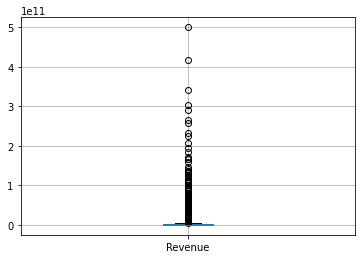

In [ ]:
df_new.boxplot('Revenue')

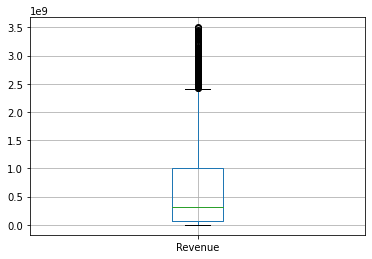

In [ ]:
df_clean.boxplot('Revenue')

In [ ]:
df_clean.shape

(2530, 11)

In [ ]:
Q1_6 = df_clean['Interest Expense'].quantile(0.25)
Q3_6 = df_clean['Interest Expense'].quantile(0.75)

IQR_6 = Q3_6 - Q1_6
print(IQR_6)

23080000.0


In [ ]:
df_clean = df_clean[df_clean['Interest Expense'] > (Q1_6 - 1.5 * IQR_6)]
df_clean = df_clean[df_clean['Interest Expense'] < (Q3_6 + 1.5 * IQR_6)]

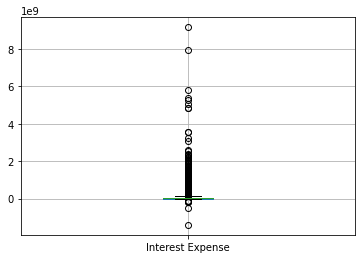

In [ ]:
df_new.boxplot('Interest Expense')

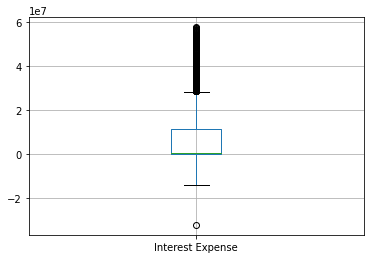

In [ ]:
df_clean.boxplot('Interest Expense')

In [ ]:
df_clean.shape

(2213, 11)

In [ ]:
Q1_7 = df_clean['Debt to Assets'].quantile(0.25)
Q3_7 = df_clean['Debt to Assets'].quantile(0.75)

IQR_7 = Q3_7 - Q1_7
print(IQR_7)

0.31284999999999996


In [ ]:
df_clean = df_clean[df_clean['Debt to Assets'] > (Q1_7 - 1.5 * IQR_7)]
df_clean = df_clean[df_clean['Debt to Assets'] < (Q3_7 + 1.5 * IQR_7)]

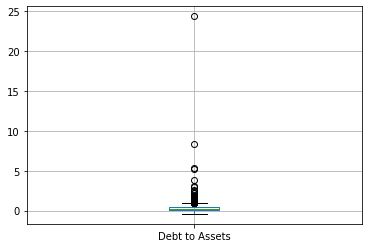

In [ ]:
df_new.boxplot('Debt to Assets')

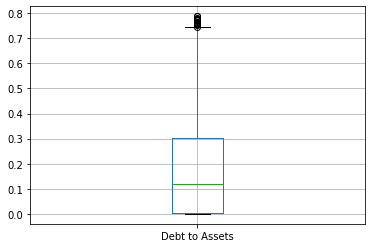

In [ ]:
df_clean.boxplot('Debt to Assets')

In [ ]:
Q1_8 = df_clean['R&D Expenses'].quantile(0.25)
Q3_8 = df_clean['R&D Expenses'].quantile(0.75)

IQR_8 = Q3_8 - Q1_8
print(IQR_8)

15573500.0


In [ ]:
df_clean = df_clean[df_clean['R&D Expenses'] > (Q1_8 - 1.5 * IQR_8)]
df_clean = df_clean[df_clean['R&D Expenses'] < (Q3_8 + 1.5 * IQR_8)]

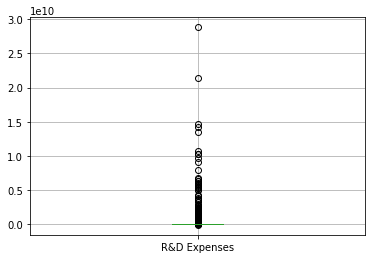

In [ ]:
df_new.boxplot('R&D Expenses')

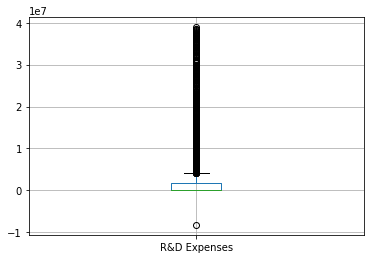

In [ ]:
df_clean.boxplot('R&D Expenses')

In [ ]:
cols = [
  'Gross Profit Growth',
  'Gross Margin',
  'Intangibles to Total Assets',
  'Net Income',
  'assetTurnover',
  'Revenue',
  'Interest Expense',
  'Debt to Assets',
  'R&D Expenses',
  'SG&A Expense'
]

In [ ]:
Q1_9 = df_clean['SG&A Expense'].quantile(0.25)
Q3_9 = df_clean['SG&A Expense'].quantile(0.75)

IQR_9 = Q3_9 - Q1_9
print(IQR_9)

136831000.0


In [ ]:
df_clean = df_clean[df_clean['SG&A Expense'] > (Q1_9 - 1.5 * IQR_9)]
df_clean = df_clean[df_clean['SG&A Expense'] < (Q3_9 + 1.5 * IQR_9)]

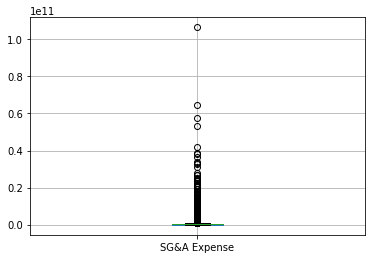

In [ ]:
df_new.boxplot('SG&A Expense')

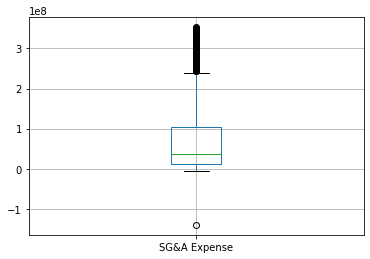

In [ ]:
df_clean.boxplot('SG&A Expense')

In [ ]:
df_clean.isna().sum().sort_values(ascending=False)

Gross Profit Growth            0
Gross Margin                   0
Intangibles to Total Assets    0
Net Income                     0
assetTurnover                  0
Revenue                        0
Interest Expense               0
Debt to Assets                 0
R&D Expenses                   0
SG&A Expense                   0
Revenue Growth                 0
dtype: int64

In [ ]:
Q1_label = df['Revenue Growth'].quantile(0.25)
Q3_label = df['Revenue Growth'].quantile(0.75)

IQR_label = Q3_label - Q1_label
print(IQR_label)

0.1885


In [ ]:
df_clean = df_clean[df_clean['Revenue Growth'] > (Q1_label - 1.5 * IQR_label)]
df_clean = df_clean[df_clean['Revenue Growth'] < (Q3_label + 1.5 * IQR_label)]

In [ ]:
df_clean.shape

(1562, 11)

## Export Cleaned Data

In [ ]:
from google.colab import files

df_clean.to_csv('2018_Financial_Data_Cleaned.csv') 
files.download('2018_Financial_Data_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Normalize Cleaned Data

In [139]:
df_normalized = df_clean.copy()

In [140]:
# Minmax Normalization 
for column in df_normalized.columns:
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())    
  
print(df_normalized)

      Gross Profit Growth  Gross Margin  Intangibles to Total Assets  \
44               0.387053      0.752144                     0.000000   
111              0.655169      0.412626                     0.557478   
123              0.890469      0.401695                     0.117103   
181              0.372718      0.407461                     0.035949   
207              0.523127      0.529208                     0.112274   
...                   ...           ...                          ...   
4384             0.386045      0.250715                     0.000000   
4386             0.386045      0.250715                     0.059423   
4387             0.386045      0.250715                     0.000000   
4389             0.828760      0.417841                     0.016499   
4390             0.386045      0.250715                     0.002951   

      Net Income  assetTurnover   Revenue  Interest Expense  Debt to Assets  \
44      0.363957       0.031914  0.000696          0.357

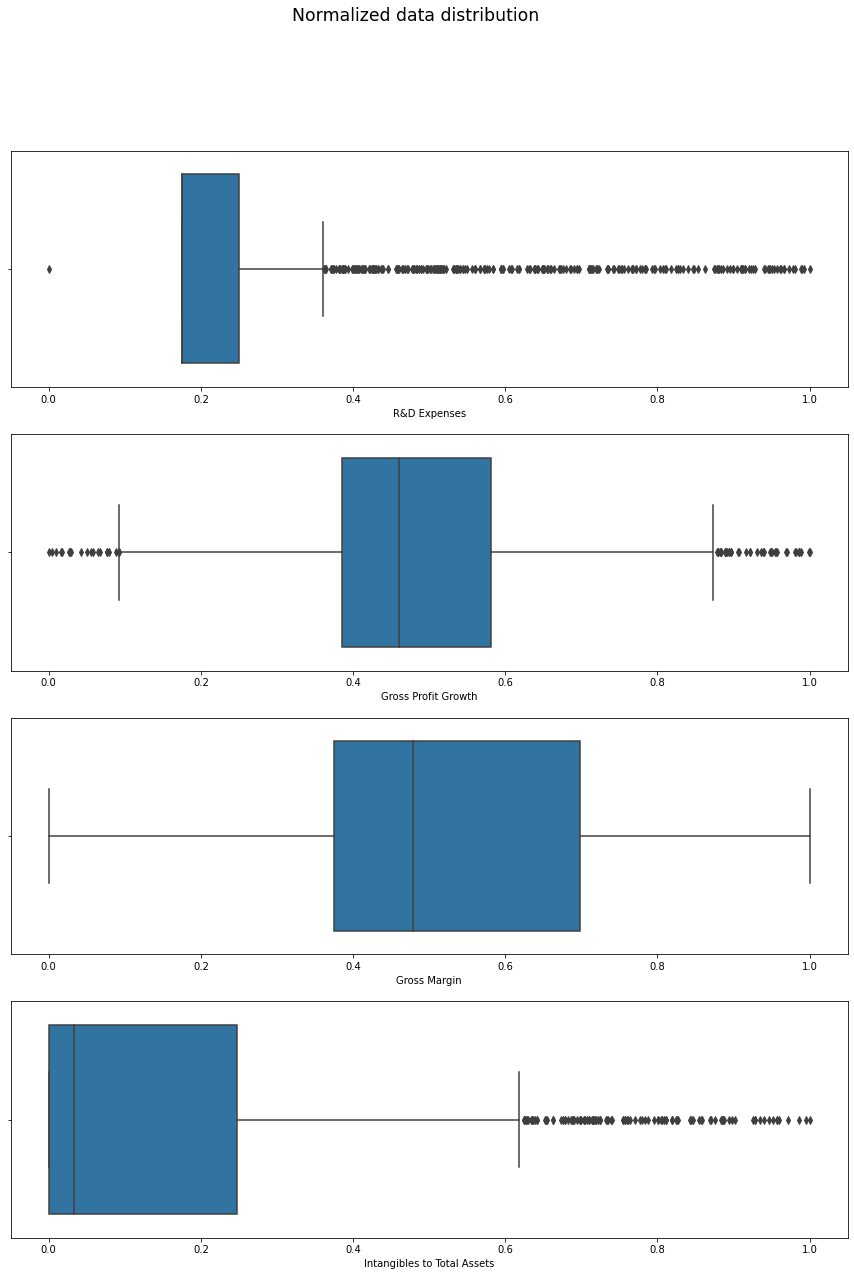

In [142]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Normalized data distribution', fontsize='xx-large')

sns.boxplot(x=df_normalized['R&D Expenses'], ax=axes[0])
axes[0].set_xlabel('R&D Expenses')

sns.boxplot(x=df_normalized['Gross Profit Growth'], ax=axes[1])
axes[1].set_xlabel('Gross Profit Growth')

sns.boxplot(x=df_normalized['Gross Margin'], ax=axes[2])
axes[2].set_xlabel('Gross Margin')

sns.boxplot(x=df_normalized['Intangibles to Total Assets'], ax=axes[3])
axes[3].set_xlabel('Intangibles to Total Assets')

plt.show()

In [145]:
df_normalized.to_csv('2018_Financial_Data_MinMax.csv') 
files.download('2018_Financial_Data_MinMax.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
def z_score(df):
    # copy the dataframe
    df_std = df_clean.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_standardized = z_score(df_clean)

df_standardized

,Gross Profit Growth,Gross Margin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense,Revenue Growth
44,-0.509235,1.381937,-0.676995,-0.752529,-1.004371,-0.676243,-0.548736,-0.941858,1.064906,-0.650924,-0.645306
111,1.007824,-0.579622,1.692354,0.056706,0.122791,1.005337,1.168667,0.843625,-0.479753,1.672741,1.189088
123,2.339211,-0.642776,-0.179295,-4.802266,-0.014315,5.214271,3.532548,0.114867,-0.479753,0.742719,2.486735
181,-0.590348,-0.609461,-0.524207,2.031889,1.343745,2.369919,-0.510042,-0.941858,-0.479753,1.154419,-0.051377
207,0.260701,0.093931,-0.199819,-0.066655,-0.309560,-0.015035,-0.317998,-0.718737,1.098946,0.542257,-0.779492
...,...,...,...,...,...,...,...,...,...,...,...
4384,-0.514939,-1.515063,-0.676995,-0.671659,-1.013825,-0.678131,-0.548736,-0.941858,1.328598,-0.813260,-0.652167
4386,-0.514939,-1.515063,-0.424439,-0.339816,-1.013825,-0.678131,-0.548736,-0.941858,-0.475383,-0.867791,-0.652167
4387,-0.514939,-1.515063,-0.676995,-0.569571,-1.013825,-0.678131,0.326304,0.628768,-0.479753,-0.831547,-0.652167
4389,1.990046,-0.549493,-0.606872,-0.284351,0.166700,-0.580926,-0.450682,0.360713,-0.289703,-0.792104,1.032791


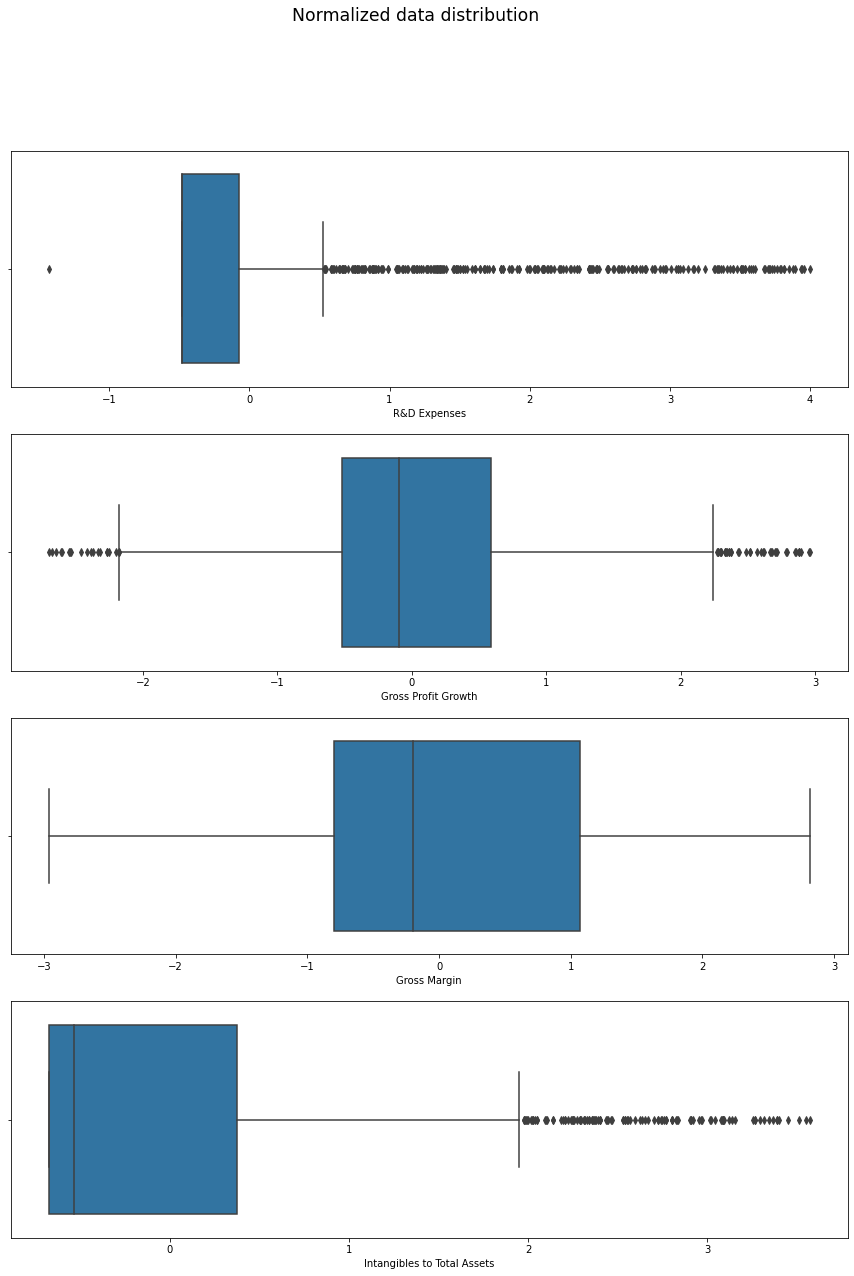

In [144]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Normalized data distribution', fontsize='xx-large')

sns.boxplot(x=df_standardized['R&D Expenses'], ax=axes[0])
axes[0].set_xlabel('R&D Expenses')

sns.boxplot(x=df_standardized['Gross Profit Growth'], ax=axes[1])
axes[1].set_xlabel('Gross Profit Growth')

sns.boxplot(x=df_standardized['Gross Margin'], ax=axes[2])
axes[2].set_xlabel('Gross Margin')

sns.boxplot(x=df_standardized['Intangibles to Total Assets'], ax=axes[3])
axes[3].set_xlabel('Intangibles to Total Assets')

plt.show()

In [146]:
df_standardized.to_csv('2018_Financial_Data_ZScore.csv') 
files.download('2018_Financial_Data_ZScore.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>